# Small Gridworld Example

Demonstrative example to illustrate policy evaluation with dynamic programming.

Iteration based on Bellman Expectation Equation:

\begin{equation}
    v_{k+1}(s)
    =
    \sum_{a \in \mathcal{A}}
    \pi(a|s)
    \left(
        \mathcal{R}_{s}^{a}
        +
        \gamma
        \sum_{s' \in S}
        P^{a}_{ss'}
        v_{k}(s')
    \right)
\end{equation}

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
class UnknownActionException(Exception):
    def __init__(self, message):

        # Call the base class constructor with the parameters it needs
        super(UnknownActionException, self).__init__(message)

In [18]:
def plot_gridworld():
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_xlim(0.0, 4.0)
    ax.set_ylim(0.0, 4.0)
    ax.set_xticks(range(0,4))
    ax.set_xticklabels('')
    ax.set_yticks(range(0,4))
    ax.set_yticklabels('')
    plt.grid()
    
    return fig, ax

In [252]:
class Environment:
    
    def __init__(self, agent_state, size=(4,4)):
        self.size = size
        self.width = size[0]
        self.height = size[1]
        self.nblocks = size[0]*size[1]
        self.nactions = 4
        self.rewards = -np.ones(shape=(self.width, self.height, self.nactions))
        self.states = np.array([(x,y) for x in range(self.width) for y in range(self.height)])
        self.actions = np.array( [[[range(4)] for y in range(self.height)]] for x in range(self.width) )
        self.agent_state = agent_state
    
    def possible_actions(self, state):
        return self.action[state[0], state1]
    
    def transition(self, current_state, action):
        
        if action == 0:
            new_x = min(0, current_state[0] - 1)
            new_y = current_state[1] 
        elif action == 1:
            new_x = max(self.width, current_state[0] + 1)
            new_y = current_state[1]
        elif action == 2:
            new_x = current_state[1]
            new_y = min(0, current_state[1] - 1)
        elif action == 3:
            new_x = current_state[1]
            new_y = max(self.height, current_state[1] + 1)
        else:
            raise UnknownActionException("Unknown action '{}'".format(action))
            
        new_state = (new_x, new_y)
        
        return new_state
    
    def update(self, action):
        reward = self.rewards[self.agent_state[0], self.agent_state[1], action]
        self.agent_state = self.transition(self.agent_state, action)
        return self.agent_state, reward

In [244]:
class Agent:
    
    def __init__(self, environment, gamma=1.0, initial_pos=(1,1)):
        self.environment = environment
        self.current_state = initial_pos
        self.gamma = gamma
        self.recent_reward = 0.0
        self.gain = 0.0
    
    def get_current_state(self):
        return self.current_state
        
        
    def act(self, action):
        new_state, reward = self.environment.update(action)
        self.current_state = new_state
        self.recent_reward = reward
        self.gain += self.gamma*reward
    
    def policy(self):
        pass

In [245]:
def policy_evaluation(environment, policy, initial_value_function):
    
    value_function = initial_value_function
    value_function_shape = value_function.shape
    
    for states in environment.states:
        value_function 

SyntaxError: invalid syntax (<ipython-input-245-60dc9e336e2d>, line 6)

In [246]:
ACTION_LABELS = { 
    (-1,  0): '←', 
    ( 1,  0): '→', 
    ( 0, -1): '↓', 
    ( 0,  1): '↑', 
}

In [247]:
actions = ['left', 'right', 'up', 'down']

## Main

In [27]:
value_function = np.zeros(shape=(4,4))

## Test area

In [221]:
agent_initial_position = (1,1)

In [253]:
E = Environment(agent_initial_position)

In [262]:
E.actions

array(<generator object Environment.__init__.<locals>.<genexpr> at 0x7f3051470780>, dtype=object)

In [229]:
A = Agent(environment=E, initial_pos=agent_initial_position)

In [230]:
A.get_current_state()

(1, 1)

In [231]:
A.act(0)

In [232]:
A.get_current_state()

(0, 1)

In [233]:
E.agent_state

(0, 1)

In [28]:
value_function

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

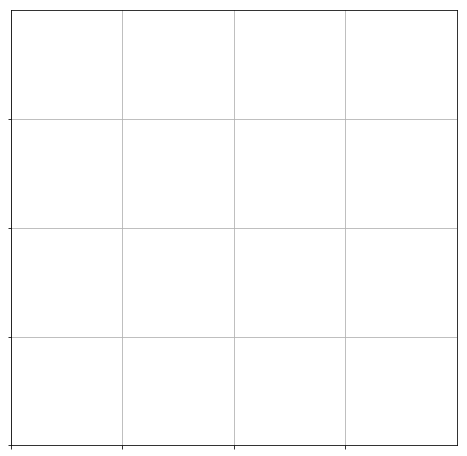

In [16]:
fig, ax = plot_gridworld()